In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'lines.markersize': 20,
          'lines.linewidth': 3
         }

pylab.rcParams.update(params)

from google.colab import files
import time

In [0]:
X_SCALE = 100

def get_y2(x):
  return np.cos(x/X_SCALE) + 1

def get_y(x):
  xn = x/X_SCALE
  return np.cos(xn) + (np.sin(xn*10)*0.3)

def get_direction(error, px, cx):

  x_dir = (((cx-px) > 0)-0.5) * 2
  error_dir = -((error > 0)-0.5) * 2
  
  gradient_dir = x_dir * error_dir

  return gradient_dir * X_SCALE

  # return x_dir * - (error*X_SCALE)

def get_error(cy, py):
  return cy-py

In [0]:
def set_title(n_iter, direction, error):
  title_str = "n_iter : %d\nDirection : %.2f, dError : %.2f" % (n_iter, direction, error)
  plt.title(title_str)

# def get_file_name():
#   global global_n
#   f_name = "%02d.png" % global_n
#   global_n += 1
#   return global_n

def save_fig(n=1):
  global global_n

  start_index = global_n

  for i in range(n):
    f_name = f_name = "%02d.png" % global_n
    global_n += 1

    plt.savefig(f_name)

  plt.show()

  for i in range(n):
    f_name = f_name = "%02d.png" % (start_index+i)

    while True:
      try:
        files.download(f_name)
        break
      except:
        print('try again ...')
        time.sleep(1)


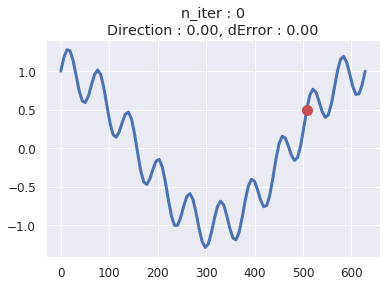

In [28]:
N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE
y = get_y(x)

# p = np.random.randint(0, x.shape[0]-1)
p = 80

cx = x[p]
cy = y[p]

plt.plot(x,y)
plt.plot(cx, cy, 'r.')
set_title(0, 0, 0)

global global_n
global_n = 0

save_fig(n=5)

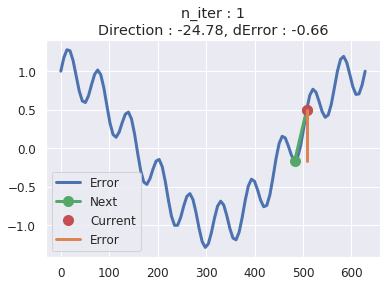

In [29]:
learning_rate = 0.5

# current_direction = get_direction(np.random.rand()-0.5, np.random.randint(0, x.max()), np.random.randint(0, x.max())) * learning_rate
current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction
ny = get_y(nx)

plt.plot(x,y)

plt.plot([cx, nx], [cy, ny], 'g.-')
plt.plot(cx, cy, 'r.')
plt.plot([cx, cx], [cy, ny])

d_error = get_error(ny, cy)
set_title(1, current_direction, d_error)
plt.legend(['Error', 'Next', 'Current', 'Error'])

save_fig()

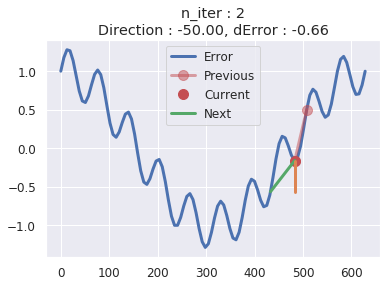

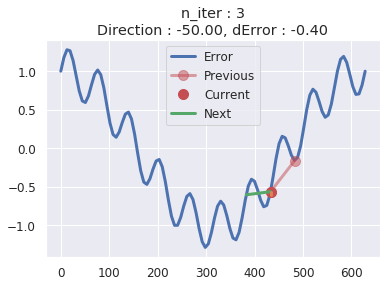

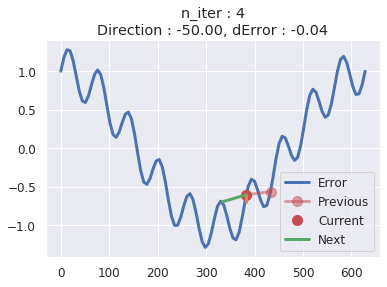

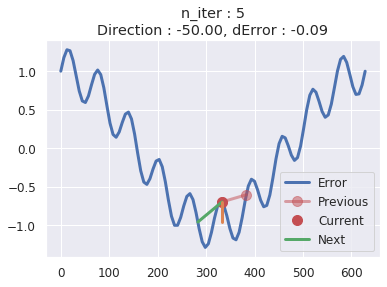

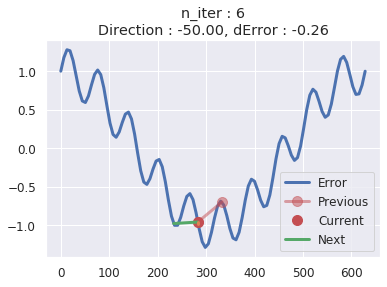

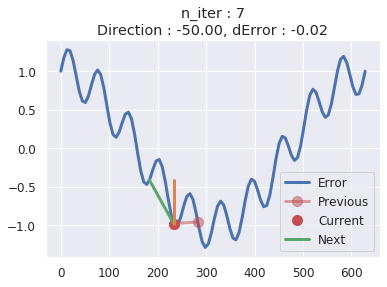

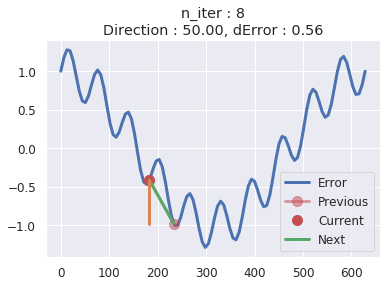

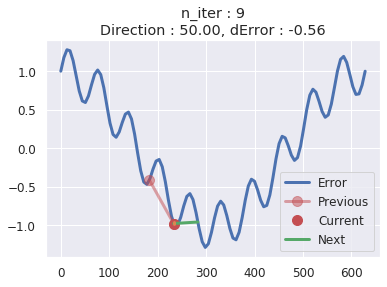

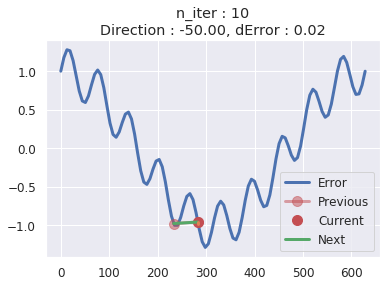

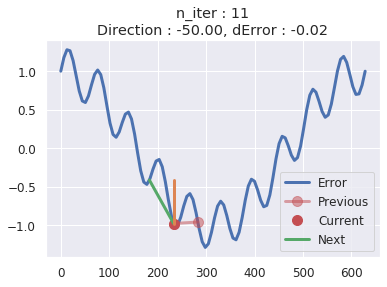

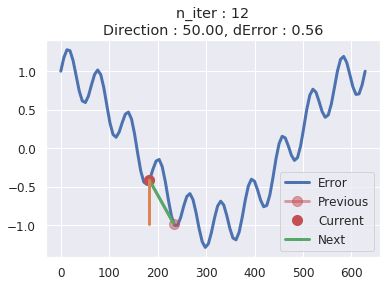

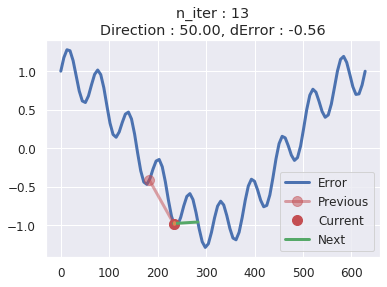

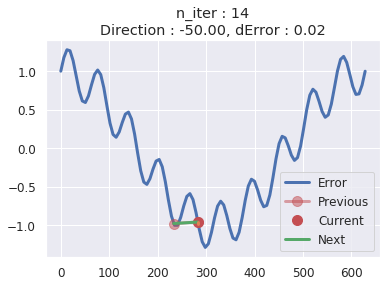

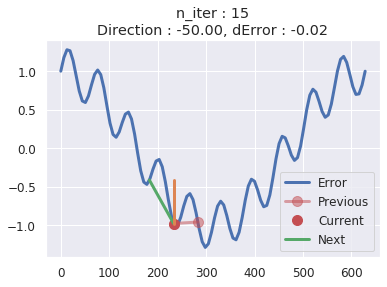

KeyboardInterrupt: ignored

In [30]:
for i in range(40):
  px, py = cx, cy

  cx, cy = nx, ny

  d_error = get_error(cy, py)
  current_direction = get_direction(d_error, px, cx) * learning_rate

  nx = cx + current_direction
  ny = get_y(nx)

  plt.plot(x,y)
  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)
  plt.plot(cx, cy, 'r.')

  plt.plot([cx, nx], [cy, ny], 'g-')
  plt.plot([cx, cx], [cy, ny])

  set_title((i+2), current_direction, d_error)
  plt.legend(['Error', 'Previous', 'Current', 'Next'])

  save_fig()
